# Testando o modelo do Detector de Emoções

## Etapa 1 - Importando as bibliotecas

In [1]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import zipfile

In [ ]:
%pip install tensorflow==2.12.0

In [4]:
import tensorflow
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
tensorflow.__version__

'2.12.0'

## Etapa 2 - Acessando os arquivos

In [ ]:
path = "../Material"

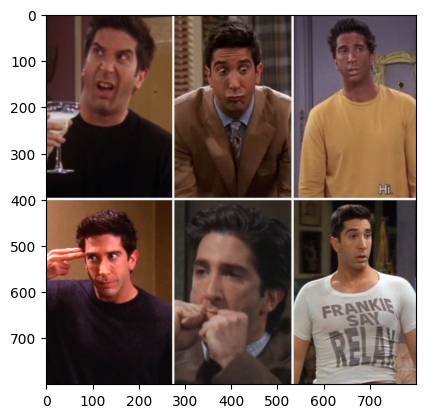

In [6]:
imagem = plt.imread(path + '/testes/teste04.jpg')
plt.imshow(imagem)

In [7]:
imagem.shape

(800, 800, 3)

## Testando o Detector

### Carregamento dos modelos

In [8]:
cascade_faces = (path + "/haarcascade_frontalface_default.xml")
caminho_modelo = (path + "/modelo_01_expressoes.h5")
face_detection = cv2.CascadeClassifier(cascade_faces)
# Carregando o modelo de emoções
classificador_emocoes = load_model(caminho_modelo, compile = False)
expressoes = ["Raiva", "Nojo", "Medo", "Feliz", "Triste", "Surpreso", "Neutro"]

### Detecção de faces

In [16]:
faces = face_detection.detectMultiScale(imagem, scaleFactor = 1.1,
                                        minNeighbors = 3, minSize = (20,20))

In [17]:
faces

array([[606,  34, 108, 108],
       [333,  62, 140, 140],
       [ 57,  25, 165, 165],
       [633, 442,  96,  96],
       [ 67, 474, 132, 132],
       [282, 486, 176, 176]], dtype=int32)

In [18]:
len(faces)

6

In [19]:
faces.shape

(6, 4)

### Extração do ROI (region of interest)

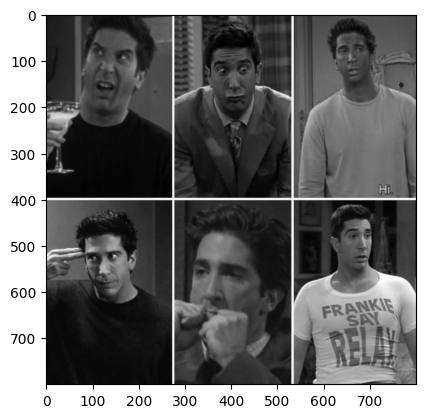

In [20]:
cinza = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)
plt.imshow(cinza, cmap='gray')

In [21]:
cinza.shape

(800, 800)

### Fazendo as faces serem recortadas automaticamente

1/1 [==============================] - 0s 46ms/step
[0.12155294 0.00292275 0.16831471 0.01634267 0.27685785 0.02025117
 0.39375794]
0.39375794
6
1/1 [==============================] - 0s 42ms/step
[6.1191688e-03 3.0622799e-05 3.0159724e-01 1.5124513e-02 2.4794382e-03
 6.7241699e-01 2.2320978e-03]
0.672417
5
1/1 [==============================] - 0s 44ms/step
[0.7555915  0.03851613 0.18034612 0.00813015 0.00710993 0.00922455
 0.00108164]
0.7555915
0
1/1 [==============================] - 0s 45ms/step
[0.12722151 0.01384203 0.41358456 0.01115866 0.24935415 0.09261444
 0.09222465]
0.41358456
2
1/1 [==============================] - 0s 42ms/step
[5.0398182e-02 3.6695517e-05 4.9412787e-02 2.0109328e-02 9.0181299e-02
 2.0688795e-03 7.8779274e-01]
0.78779274
6
1/1 [==============================] - 0s 105ms/step
[0.07078217 0.00075703 0.19725297 0.00699325 0.49394473 0.00356804
 0.22670189]
0.49394473
4


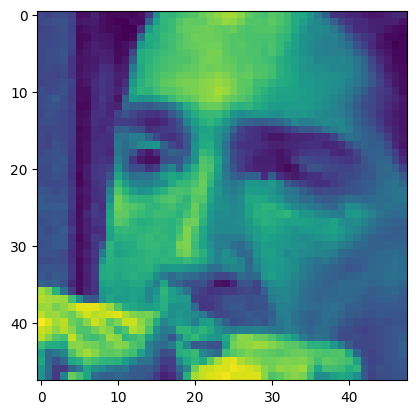

In [ ]:
original = imagem.copy()

for (x, y, w, h) in faces:
  # Extração do ROI
  roi = cinza[y:y + h, x:x + w] # utilizamos as coordenadas (onde inicia a face) e a largura e altura para extrair a região de interesse

  # Redimensiona imagem
  roi = cv2.resize(roi, (48, 48))

  plt.imshow(roi)

  # Normalização
  roi = roi.astype("float") / 255
  roi = img_to_array(roi)
  roi = np.expand_dims(roi, axis = 0)

  # Previsões
  preds = classificador_emocoes.predict(roi)[0]
  print(preds)

  # Emoção detectada
  emotion_probability = np.max(preds)
  print(emotion_probability)

  print(preds.argmax())
  label = expressoes[preds.argmax()]

  # Mostra resultado na tela para o rosto
  cv2.putText(original, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.65,
            (0, 0, 255), 2, cv2.LINE_AA)
  cv2.rectangle(original, (x, y), (x + w, y + h), (0, 0, 255), 2)

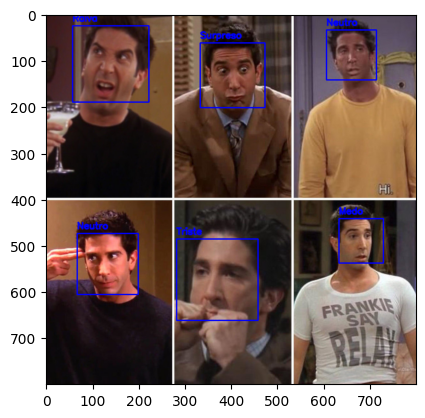

In [38]:
plt.imshow(original, cmap='gray')